# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<ul>
 <li>   Which variables are significant in predicting the demand for shared bikes.</li>
  <li>  How well those variables describe the bike demands</li>
  <li>  Based on various meteorological surveys and people's styles, the service provider firm has gathered a large - ---- dataset on daily bike demands across the American market based on some factors.</li>


## Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

In [2]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from math import sqrt

In [4]:
# reading data
bike_data = pd.read_csv("day.csv")

In [5]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_data.shape

(730, 16)

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There are no outliers because we can see that there is no much difference between Mean and Median

## Step 2: Visualising the Data

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

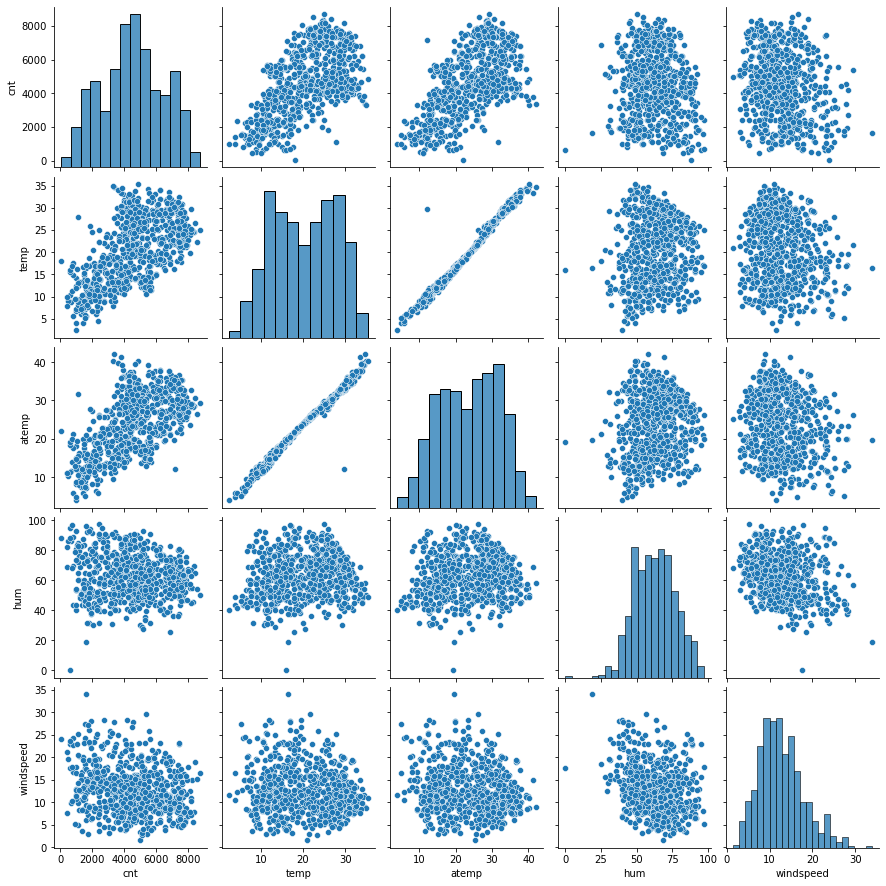

In [9]:
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables

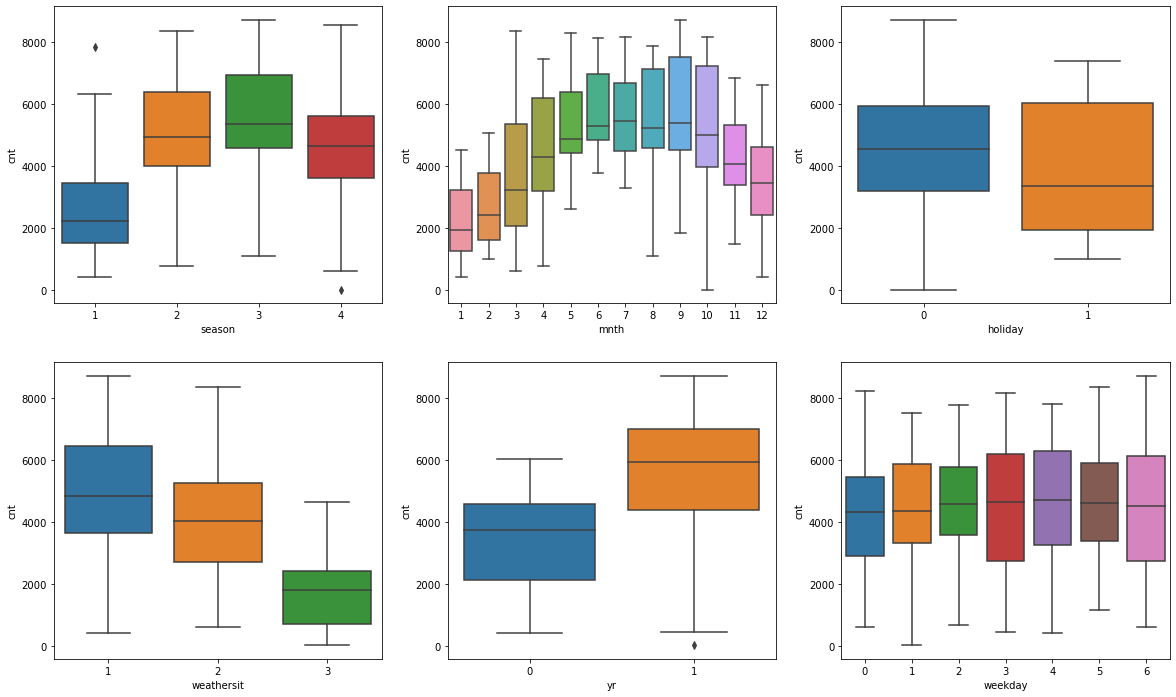

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

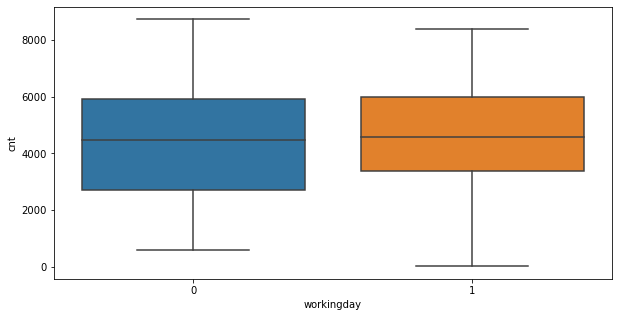

In [11]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

## Step 3: Data Preparation

In [10]:
## dropping columns that are irrelevant for the model - 
bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [12]:
# maping seasons
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [13]:
# mapping weathersit
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [14]:
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [15]:
# Check the dataframe now

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [16]:
# creating dummy variables for season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]
dummy = pd.get_dummies(dummy,drop_first=True )
# adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [17]:
# Now let's see the head of our dataframe.
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
## dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [19]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bike_data.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [21]:
train, test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

## Step 5 :Rescaling the Features

In [22]:
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [24]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [25]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


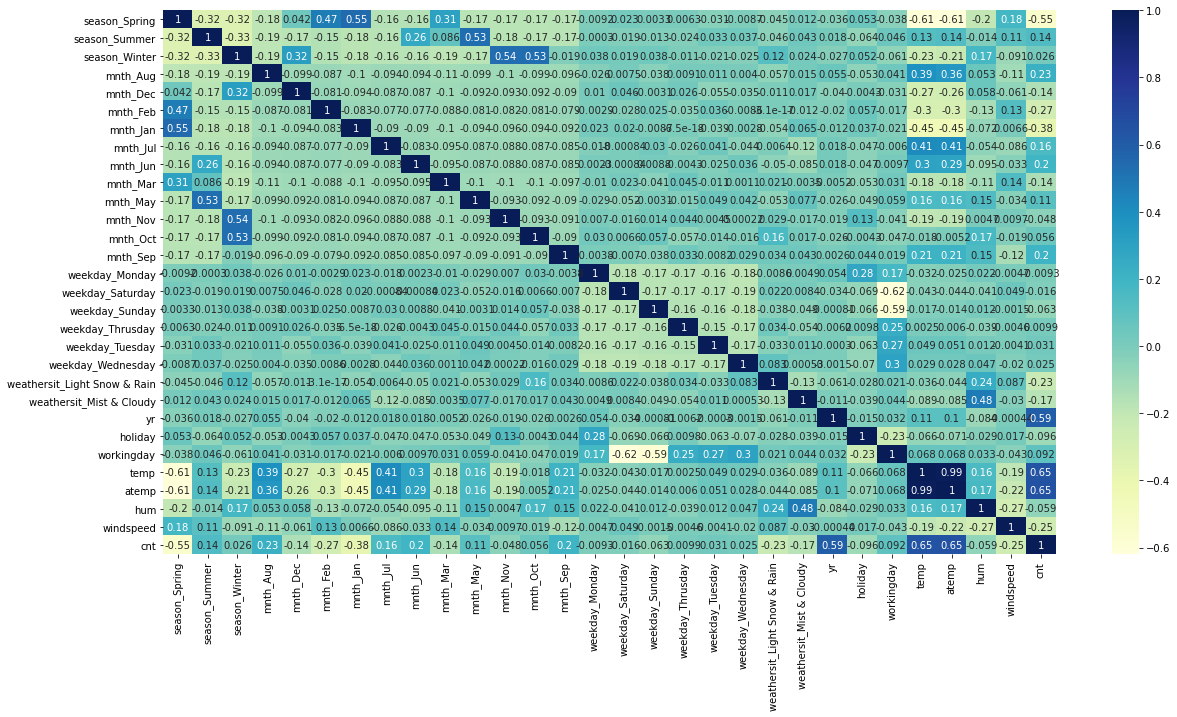

In [26]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We'll first build a model using all the columns

### Dividing into X and Y sets for the model building

In [28]:
y_train = train.pop('cnt')
X_train = train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [30]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 11),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Starting with all the columns selected by RFE

### Model 1

In [33]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [63]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)


In [64]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [65]:
# Check the parameters obtained
lm.params

const                           0.280276
season_Spring                  -0.056416
season_Summer                   0.053249
season_Winter                   0.097229
mnth_Jul                       -0.057558
mnth_Sep                        0.082971
weekday_Saturday                0.017480
weathersit_Light Snow & Rain   -0.238105
weathersit_Mist & Cloudy       -0.053198
yr                              0.229800
holiday                        -0.093935
temp                            0.530449
hum                            -0.169705
windspeed                      -0.183413
dtype: float64

In [66]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.31e-189
Time:                        19:57:04   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## dropping weekday_Saturday since it has p > 0.05

In [67]:
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

Rebuilding the model without 'weekday_Saturday'

### Model 2

In [68]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [69]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          2.95e-190
Time:                        19:58:09   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
season_Spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_Summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_Winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                         0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [72]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.48
2,season_Summer,2.62
11,hum,1.89
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


#### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [73]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [74]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.03
9,temp,16.03
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.33
1,season_Summer,2.79
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


### Model 3 (final model)

In [75]:
### dropping hum from the model
X_train_new = X_train_new.drop(['hum'], axis=1)

In [76]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [77]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.06e-187
Time:                        21:51:10   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [78]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.23
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.78
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

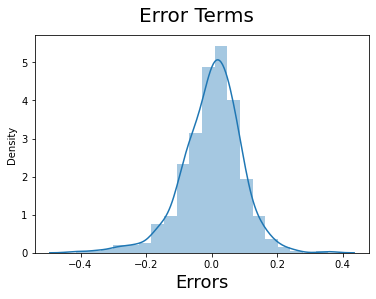

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [82]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [83]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [84]:
y_test = test.pop('cnt')
X_test = test

In [85]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [86]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_Spring                 220 non-null    uint8  
 2   season_Summer                 220 non-null    uint8  
 3   season_Winter                 220 non-null    uint8  
 4   mnth_Jul                      220 non-null    uint8  
 5   mnth_Sep                      220 non-null    uint8  
 6   weathersit_Light Snow & Rain  220 non-null    uint8  
 7   weathersit_Mist & Cloudy      220 non-null    uint8  
 8   yr                            220 non-null    int64  
 9   holiday                       220 non-null    int64  
 10  temp                          220 non-null    float64
 11  windspeed                     220 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [87]:
# Making predictions using the fourth model
y_pred = lm.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8052680349048552

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009310968608097095

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

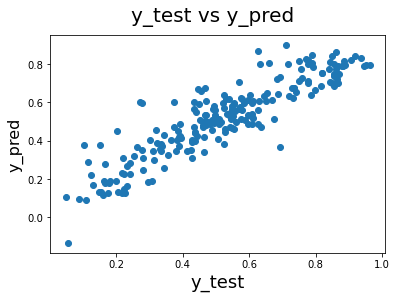

In [91]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [92]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
10,temp,0.490988
8,yr,0.233570
0,const,0.199434
3,season_Winter,0.081741
5,mnth_Sep,0.076846
2,season_Summer,0.046487
4,mnth_Jul,-0.052057
1,season_Spring,-0.067169
7,weathersit_Mist & Cloudy,-0.080167



We can see that the equation of our best fitted line is:

 cnt = 0.199648 + 0.491508  X  temp + 0.233482  X  yr + 0.083084 X season_Winter - 0.066942 X season_ Spring	 + 0.083084 X season_Winter -0.052418 X mnth_Jul + 0.076686 X mnth_Sep -0.285155 X weathersit_Light Snow & Rain -0.081558 X weathersit_Mist & Cloudy -0.098013 X holiday -0.147977X windspeed 


##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.